<a href="https://colab.research.google.com/github/Melisa7L/FIA_2023_Lino/blob/main/TP06_FIA_LINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalamos las librerias**

In [2]:
install.packages('neuralnet')
install.packages('NeuralNetTools')
install.packages('ggplot2')
install.packages('gridExtra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library('neuralnet')
library('NeuralNetTools')
library('ggplot2')
library('gridExtra')

**1.Crear un dataset artificial balanceado a partir de datos generados aleatoriamente con distribución normal de dimensiones [100,3]. Generar los primeros 50 patrones (perteneciente a la clase 1) con una distribución normal con media=5 y SD=2. Generar los 50 patrones restantes (perteneciente a la clase 0) con una distribución normal con media=11 y SD=2.**

In [4]:
set.seed(134678) #seteamos la semilla
X1<- c(rnorm(50,5,2),rnorm(50,11,2)) #Generamos el primer vector con 50 filas correspondientes a cada clase
X2<- c(rnorm(50,5,2),rnorm(50,11,2)) #Generamos el primer vector con 50 filas correspondientes a cada clase
clase<- c(rep(1,50),rep(0,50)) #Generamos el vector de etiquetas

**2.Aplicar al dataset el método Hold-Out con un 70% para entrenar y el resto para prueba.**

In [7]:
set.seed(134678)
#Creamos indices de muestra para seleccionar 15 elementos aleatorios de cada clase
indice.test1<-sample(1:50,15)
indice.test0<-sample(51:100,15)
#Usamos los indices creados para separar los datos de entrenamiento (X1tr y X2tr) y los de prueba (X1test y X2test)
X1tr<-X1[-c(indice.test1,indice.test0)]
X2tr<-X2[-c(indice.test1,indice.test0)]
X1test<-X1[c(indice.test1,indice.test0)]
X2test<-X2[c(indice.test1,indice.test0)]
#Hacemos lo mismo con el vector de etiquetas
clase_tr<-clase[-c(indice.test1,indice.test0)]
clase_test<-clase[c(indice.test1,indice.test0)]
#Finalmente armamos los df de entrenamiento y prueba
dataset_train_RNA<-data.frame(X1tr,X2tr,clase_tr)
dataset_test<-data.frame(X1test,X2test,clase_test)

**3.Graficar el dataset de test. Los patrones de la clase 1 con color rojo y los patrones de la clase 0 con azul. Colocar a la gráfica el título “Dataset Test”. Etiquetar los ejes de la gráfica con “X1” y “X2”. Guardar la gráfica en formato PDF con el nombre “Grafica_dataset_test.pdf”.**

In [15]:
pdf("Grafica_dataset_test.pdf")
ggplot(data=dataset_test,aes(x=X1test,y=X2test,color=as.factor(clase_test)))+geom_point()+labs(title="Dataset Test",x="X1",y="X2")+scale_color_manual(values=c("blue","red"),name='Clase')
dev.off()

png 
  2

**4.Entrenar 10 veces una red neuronal con el algoritmo Back Propagation, la red debe tener 10 neuronas en la capa oculta, además se debe usar la derivada de la función de error como criterio de parada (la suma de errores cuadráticos) con un umbral igual a 0.01, función de activación logística (logistic) tanto para la capa oculta como para la capa de salida y learning rate =0.001. (En caso de no converger ajuste los parámetros necesarios para asegurar la convergencia).**

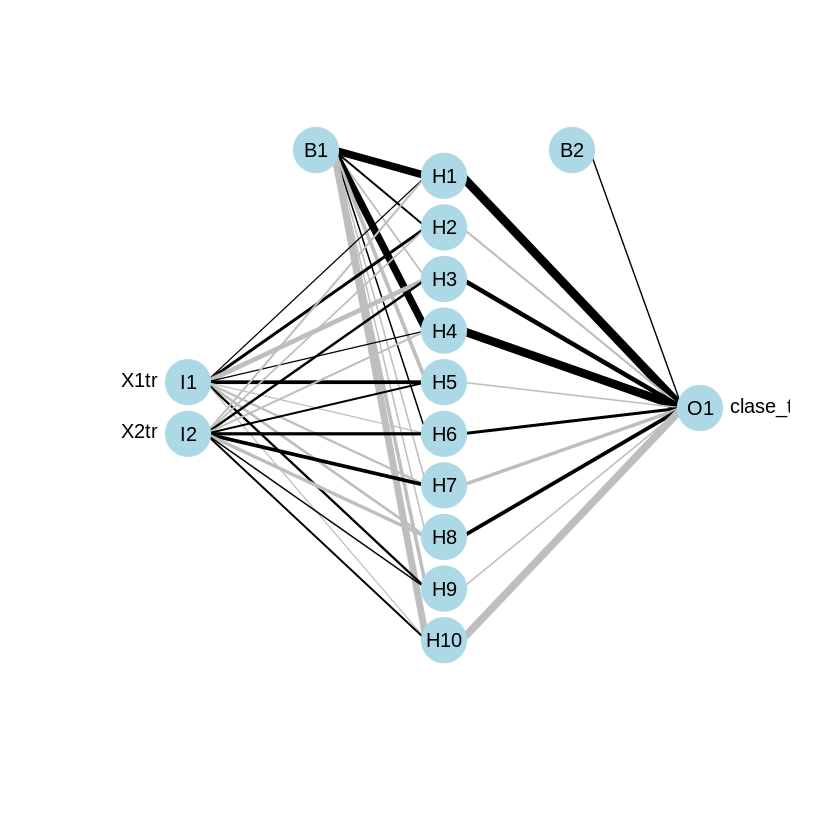

In [16]:
red<-neuralnet(
  clase_tr~X1tr+X2tr, #formula
  dataset_train_RNA, #data
  hidden=10,  #capas ocultas
  linear.output=FALSE , #si act.fct NO debe aplicarse a la salida, TRUE , de lo contrario como FALSE
  act.fct="logistic" , #funcion de activacion
  algorithm="backprop", #tipo de algoritmo
  threshold=0.01, #umbral
  learningrate=0.005,  #tasa de aprendizaje
  rep=10  #cantidad de repeticiones
)
plotnet(red,rep='best')  #graficamos la mejor configuracion

**5.Realizar las predicciones sobre el conjunto de prueba. Calcular el error de Clasificación de la red.**

In [17]:
pred<-compute(red,dataset_test[,-3])  #usamos 'compute'  para realizar las predicciones con el df de prueba

In [18]:
pred$net.result

0.9999991180
0.9999989719
0.6517434315
0.9999932144
0.9982769874
0.9999772567
0.9999948067
0.9999962956
0.9999523546
0.7161506542
0.9999855163


In [20]:
predicciones_RNA<-round(pred$net.result) #guardamos las predicciones
ErrorC_RNA<-sum(predicciones_RNA!=dataset_test[,3])/length(dataset_test[,3])  #calculamos el error
print(ErrorC_RNA)

[1] 0.1666667


**6.Graficar las predicciones obtenidas. Los patrones de la clase 1 con color rojo y los patrones de la clase 0 con azul. Colocar a la gráfica el título “Predicciones RNA”. Etiquetar los ejes de la gráfica con “X1” y “X2”. Guardar la gráfica en formato PDF con el nombre “Grafica_predicciones_RNA.pdf”.**

In [21]:
predicciones<-cbind(dataset_test[,1:2],predicciones_RNA)

In [25]:
pdf("Grafica_dataset_test.pdf")
ggplot(data=as.data.frame(predicciones),aes(x=X1test,y=X2test,color=as.factor(predicciones_RNA)))+
geom_point()+
labs(title="Dataset Test",x="X1",y="X2" )+
scale_color_manual(values=c("blue","red"),name='Clase')
dev.off()

png 
  2

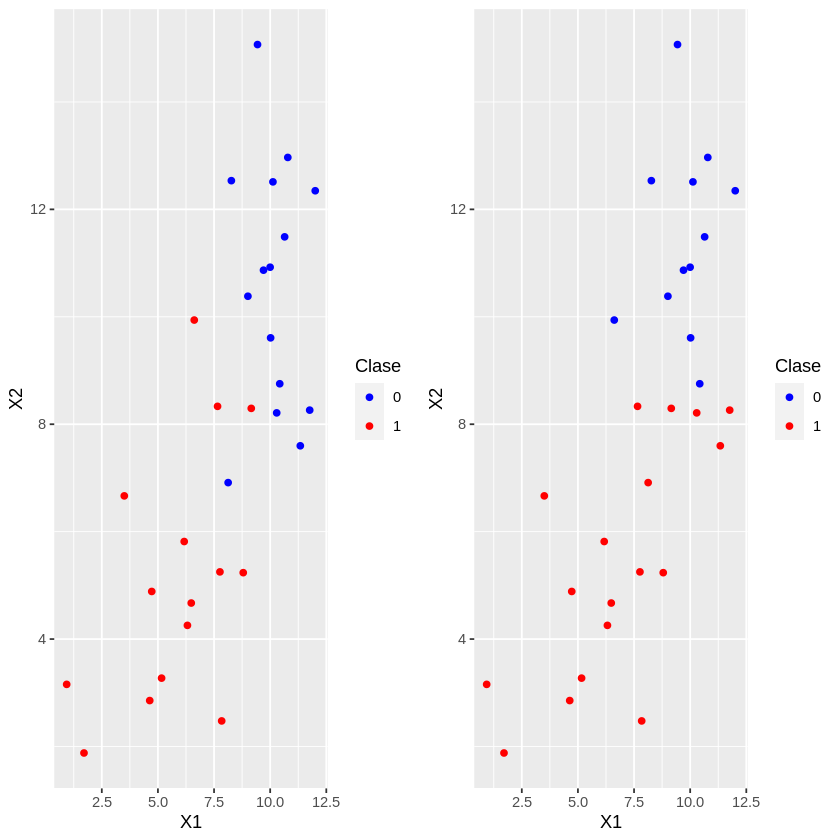

In [26]:
#Grafico para el conjunto de datos de prueba
plot_dataset_test<-ggplot(data=dataset_test,aes(x=X1test, y=X2test,color=as.factor(clase_test)))+
  geom_point()+
  labs(tilte="Dataset Test" , x="X1" , y="X2")+
  scale_color_manual(values=c("blue","red"),name='Clase')

#Grafico para las predicciones
plot_predictions<-ggplot(data=as.data.frame(predicciones),aes(x=X1test, y=X2test,color=as.factor(predicciones_RNA)))+
  geom_point()+
  labs(tilte="Predicciones" , x="X1" , y="X2")+
  scale_color_manual(values=c("blue","red"),name='Clase')
grid.arrange(plot_dataset_test,plot_predictions,ncol=2)